In [15]:
import json
from pathlib import Path

print("Working dir:", Path.cwd())
print("tracks_path (raw):", tracks_path)
try:
    print("tracks_path.resolve():", tracks_path.resolve())
except Exception:
    print("tracks_path.resolve() non disponibile")
print("exists:", tracks_path.exists())

if not tracks_path.exists():
    # prova a cercare il file nella cartella di lavoro e sotto-cartelle
    candidates = list(Path.cwd().rglob('tracks.json'))
    if not candidates:
        candidates = list(Path.cwd().rglob('*tracks*.json'))
    if candidates:
        tracks_path = candidates[0]
        print(f"Trovato file: {tracks_path}")
    else:
        print(f"File non trovato: {tracks_path}. Posiziona il file in {Path.cwd()} o fornisci il percorso corretto.")
        tracks = pd.DataFrame()  # mantiene 'tracks' vuoto
        raise FileNotFoundError(f"No tracks.json found at {tracks_path}")

# Se siamo qui, il file esiste (o è stato trovato)
try:
    tracks = pd.read_json(tracks_path)
    print(f"Caricati {len(tracks)} record da {tracks_path}")
except ValueError:
    try:
        tracks = pd.read_json(tracks_path, lines=True)
        print(f"Caricati {len(tracks)} record (lines) da {tracks_path}")
    except Exception:
        with open(tracks_path, "r", encoding="utf-8") as f:
            data = json.load(f)
        tracks = pd.json_normalize(data)
        print(f"Caricati {len(tracks)} record (json_normalize) da {tracks_path}")
except Exception as e:
    print(f"Errore durante la lettura di {tracks_path}: {e}")

Working dir: /Users/nicholasvannucci/dss_lab_project
tracks_path (raw): /Users/nicholasvannucci/dss_lab_project/dataset/tracks.json
tracks_path.resolve(): /Users/nicholasvannucci/dss_lab_project/dataset/tracks.json
exists: True
Caricati 11166 record da /Users/nicholasvannucci/dss_lab_project/dataset/tracks.json


In [16]:
import pandas as pd

tracks = pd.read_json('dataset/tracks.json')



In [20]:
# cerca un file .xml in dataset/ o nella working dir
candidates_xml = list(Path('dataset').rglob('*.xml')) if Path('dataset').exists() else []
if not candidates_xml:
    candidates_xml = list(Path.cwd().rglob('*.xml'))
if not candidates_xml:
    raise FileNotFoundError("Nessun file .xml trovato in 'dataset' o nella working dir.")
xml_path = candidates_xml[0]
print("Apro:", xml_path)

# prova a leggere con pandas.read_xml (se disponibile)
try:
    artists = pd.read_xml(xml_path)
    print(f"Caricate {len(artists)} righe in artists con pd.read_xml")
except Exception as e:
    print("pd.read_xml non utilizzabile o xml complesso:", e)
    import xml.etree.ElementTree as ET
    tree = ET.parse(xml_path)
    root = tree.getroot()
    # conversione semplice: ogni figlio diretto di root diventa un record
    records = []
    for child in root:
        rec = {}
        for elem in child:
            # se ci sono sotto-elementi si ignora la gerarchia per semplicità
            rec[elem.tag] = elem.text
        records.append(rec)
    artists = pd.DataFrame(records)
    print(f"Parse fatto con ElementTree: {len(artists)} righe")

artists.head()


Apro: dataset/artists.xml
Caricate 104 righe in artists con pd.read_xml


,id_author,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude
0,ART82291002,99 posse,M,None,None,None,gruppo musicale italiano,1991-01-01,NaN,None,None,None,NaN,NaN
1,ART53496045,achille lauro,M,1990-07-11,Verona,Italia,cantautore e rapper italiano (1990-),2012-01-01,NaN,Verona,Veneto,Italia,45.442498,10.985738
2,ART18853907,alfa,M,None,None,None,None,None,NaN,None,None,None,NaN,NaN
3,ART64265460,anna pepe,F,None,None,None,None,None,NaN,None,None,None,NaN,NaN
4,ART75741740,articolo 31,M,None,None,None,gruppo musicale hip hop italiano,1990-01-01,NaN,None,None,None,NaN,NaN


In [21]:
artists.head()

,id_author,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude
0,ART82291002,99 posse,M,None,None,None,gruppo musicale italiano,1991-01-01,NaN,None,None,None,NaN,NaN
1,ART53496045,achille lauro,M,1990-07-11,Verona,Italia,cantautore e rapper italiano (1990-),2012-01-01,NaN,Verona,Veneto,Italia,45.442498,10.985738
2,ART18853907,alfa,M,None,None,None,None,None,NaN,None,None,None,NaN,NaN
3,ART64265460,anna pepe,F,None,None,None,None,None,NaN,None,None,None,NaN,NaN
4,ART75741740,articolo 31,M,None,None,None,gruppo musicale hip hop italiano,1990-01-01,NaN,None,None,None,NaN,NaN


In [22]:
tracks.head()

,id,id_artist,title,featured_artists,primary_artist,language,album,swear_IT,swear_EN,swear_IT_words,...,album_release_date,album_type,disc_number,track_number,duration_ms,explicit,popularity,id_album,lyrics,streams@1month
0,TR934808,ART04205421,​polka 2 :-/,"Ernia, Guè",Rosa Chemical,pl,FOREVER AND EVER,13,6,"['cazzo', 'cesso', 'coglioni', 'figa', 'merda'...",...,2021-04-09,album,1.0,3.0,207761.0,1.0,46.0,ALB115557,"Oplà, ah\nBdope, chiama due b—\n\nMi candidere...",186522
1,TR760029,ART04205421,POLKA,Thelonious B.,Rosa Chemical,en,FOREVER AND EVER,9,12,"['cazzo', 'culo', 'frocio', 'puttana', 'sega',...",...,2021-04-09,album,1.0,3.0,207761.0,1.0,46.0,ALB115557,"Greg Willen, non dormire\n(Brr-poh)\n\nT-T-Tro...",194313
2,TR916821,ART04205421,​britney ;-),"MamboLosco, RADICAL",Rosa Chemical,en,FOREVER AND EVER,16,12,"['bastardo', 'cazzo', 'culo', 'merda', 'troia']",...,2021-04-09,album,1.0,1.0,193544.0,1.0,39.0,ALB115557,"Mothz\nYeah, yeah, yeah-yeah\nBdope, chiama du...",63750
3,TR480968,ART04205421,CEO,Taxi B,Rosa Chemical,it,OKAY OKAY !! - EP,8,3,"['cazzo', 'culo', 'fottere', 'merda', 'pompino...",...,2025-05-16,single,1.0,2.0,169000.0,1.0,47.0,ALB730959,Designer sui vestiti penso di essere un outlet...,41473
4,TR585039,ART04205421,LONDRA,Rkomi,Rosa Chemical,en,FOREVER AND EVER,1,0,['cazzo'],...,2020-05-28,album,1.0,8.0,194779.0,1.0,41.0,ALB436151,"Bdope (Yeah)\n\nVuole solo me, non fare la gel...",30553


In [23]:
import pandas as pd
from pathlib import Path

# === Normalizzazione nomi colonne ===
tracks.columns = tracks.columns.str.strip().str.lower().str.replace(" ", "_")
artists.columns = artists.columns.str.strip().str.lower().str.replace(" ", "_")

# === Preview ===
print("Tracks:", tracks.shape)
display(tracks.head(100))

print("Artists:", artists.shape)
display(artists.head(100))

# === Tipi di dati ===
print("\n--- Dtypes (tracks) ---")
display(tracks.dtypes.to_frame("dtype"))
print("\n--- Dtypes (artists) ---")
display(artists.dtypes.to_frame("dtype"))

# === Missing values ===
def missing_report(df):
    m = df.isna().sum()
    return pd.DataFrame({
        "missing": m,
        "ratio": (m / len(df)).round(3)
    }).sort_values("ratio", ascending=False)

print("\n--- Missing values (tracks, top 20) ---")
display(missing_report(tracks).head(20))

print("\n--- Missing values (artists) ---")
display(missing_report(artists))

# === Duplicati ===
print("\nDuplicati tracks:", tracks.duplicated().sum())
print("Duplicati artists:", artists.duplicated().sum())

# === Cardinalità e overview ===
print("\n--- Numero valori unici (tracks) ---")
display(tracks.nunique().sort_values(ascending=False).head(20))

print("\n--- Numero valori unici (artists) ---")
display(artists.nunique().sort_values(ascending=False).head(20))

# === Statistiche numeriche di base ===
print("\n--- Descrizione numerica (tracks) ---")
display(tracks.describe())

print("\n--- Descrizione numerica (artists) ---")
display(artists.describe())

Tracks: (11166, 37)


,id,id_artist,title,featured_artists,primary_artist,language,album,swear_it,swear_en,swear_it_words,...,album_release_date,album_type,disc_number,track_number,duration_ms,explicit,popularity,id_album,lyrics,streams@1month
0,TR934808,ART04205421,​polka 2 :-/,"Ernia, Guè",Rosa Chemical,pl,FOREVER AND EVER,13,6,"['cazzo', 'cesso', 'coglioni', 'figa', 'merda'...",...,2021-04-09,album,1.0,3.0,207761.0,1.0,46.0,ALB115557,"Oplà, ah\nBdope, chiama due b—\n\nMi candidere...",186522
1,TR760029,ART04205421,POLKA,Thelonious B.,Rosa Chemical,en,FOREVER AND EVER,9,12,"['cazzo', 'culo', 'frocio', 'puttana', 'sega',...",...,2021-04-09,album,1.0,3.0,207761.0,1.0,46.0,ALB115557,"Greg Willen, non dormire\n(Brr-poh)\n\nT-T-Tro...",194313
2,TR916821,ART04205421,​britney ;-),"MamboLosco, RADICAL",Rosa Chemical,en,FOREVER AND EVER,16,12,"['bastardo', 'cazzo', 'culo', 'merda', 'troia']",...,2021-04-09,album,1.0,1.0,193544.0,1.0,39.0,ALB115557,"Mothz\nYeah, yeah, yeah-yeah\nBdope, chiama du...",63750
3,TR480968,ART04205421,CEO,Taxi B,Rosa Chemical,it,OKAY OKAY !! - EP,8,3,"['cazzo', 'culo', 'fottere', 'merda', 'pompino...",...,2025-05-16,single,1.0,2.0,169000.0,1.0,47.0,ALB730959,Designer sui vestiti penso di essere un outlet...,41473
4,TR585039,ART04205421,LONDRA,Rkomi,Rosa Chemical,en,FOREVER AND EVER,1,0,['cazzo'],...,2020-05-28,album,1.0,8.0,194779.0,1.0,41.0,ALB436151,"Bdope (Yeah)\n\nVuole solo me, non fare la gel...",30553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,TR931906,ART19605256,Monica Bellucci,Angelino Panebianco,Beba,pl,Crisalide,1,0,['incazzare'],...,2021-10-21,album,1.0,14.0,158577.0,1.0,17.0,ALB667746,"Tra tutte 'ste attrici, Monica Bellucci (Ehi)\...",5001
96,TR247496,ART19605256,Crisalide,Carl Brave,Beba,it,Crisalide,0,0,[],...,2021-10-21,album,1.0,6.0,188017.0,1.0,37.0,ALB667746,"Mentre odio le code, leggo sopra i muri dei ba...",5059
97,TR332893,ART19605256,Lesbo Chic,M¥SS KETA,Beba,pl,Crisalide,5,3,"['cagna', 'figa', 'grilletto', 'palle']",...,2021-10-21,album,1.0,13.0,161939.0,1.0,16.0,ALB667746,"Lesbo chic, pupa, dammi un kiss\nSto con la cl...",4866
98,TR412109,ART19605256,Ragazza Ladra,Vipra,Beba,it,Crisalide,1,0,['puttana'],...,2021-10-21,album,1.0,9.0,159406.0,1.0,14.0,ALB667746,"Va bene, sto al gioco\nMa smetto quando voglio...",4061


Artists: (104, 14)


,id_author,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude
0,ART82291002,99 posse,M,None,None,None,gruppo musicale italiano,1991-01-01,NaN,None,None,None,NaN,NaN
1,ART53496045,achille lauro,M,1990-07-11,Verona,Italia,cantautore e rapper italiano (1990-),2012-01-01,NaN,Verona,Veneto,Italia,45.442498,10.985738
2,ART18853907,alfa,M,None,None,None,None,None,NaN,None,None,None,NaN,NaN
3,ART64265460,anna pepe,F,None,None,None,None,None,NaN,None,None,None,NaN,NaN
4,ART75741740,articolo 31,M,None,None,None,gruppo musicale hip hop italiano,1990-01-01,NaN,None,None,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ART85780419,tedua,M,1994-02-21,Genova,Italia,"cantautore, rapper e attore italiano (1994-)",None,NaN,Genova,Liguria,Italia,44.407260,8.933862
96,ART88026810,thasup,M,2001-03-17,Fiumicino,Italia,rapper e produttore discografico italiano (2001-),2015-01-01,NaN,Roma,Lazio,Italia,41.771214,12.227885
97,ART51721248,tony boy,M,1999-09-26,Padova,Italia,rapper italiano (1999-),None,NaN,Padova,Veneto,Italia,45.391408,11.805849
98,ART57242110,tony effe,M,1991-05-17,Roma,Italia,rapper italiano (1991-),None,NaN,Roma,Lazio,Italia,41.893320,12.482932



--- Dtypes (tracks) ---


,dtype
id,object
id_artist,object
title,object
featured_artists,object
primary_artist,object
language,object
album,object
swear_it,int64
swear_en,int64
swear_it_words,object



--- Dtypes (artists) ---


,dtype
id_author,object
name,object
gender,object
birth_date,object
birth_place,object
nationality,object
description,object
active_start,object
active_end,float64
province,object



--- Missing values (tracks, top 20) ---


,missing,ratio
featured_artists,7649,0.685
album,1514,0.136
day,1323,0.118
month,1197,0.107
year,444,0.040
language,105,0.009
n_sentences,76,0.007
album_name,78,0.007
disc_number,78,0.007
avg_token_per_clause,76,0.007



--- Missing values (artists) ---


,missing,ratio
active_end,104,1.000
active_start,54,0.519
region,36,0.346
province,34,0.327
country,34,0.327
nationality,33,0.317
birth_place,32,0.308
latitude,32,0.308
longitude,32,0.308
birth_date,31,0.298



Duplicati tracks: 0
Duplicati artists: 0

--- Numero valori unici (tracks) ---


lyrics                  11153
id                      11093
rolloff                 10785
pitch                   10782
spectral_complexity     10579
loudness                10561
title                   10521
char_per_tok             9844
duration_ms              7910
avg_token_per_clause     7569
streams@1month           6010
flux                     4633
bpm                      4119
id_album                 3061
rms                      2775
swear_it_words           2659
flatness                 2536
album_name               2421
featured_artists         1740
album_release_date       1390
dtype: int64


--- Numero valori unici (artists) ---


id_author       104
name            104
birth_date       73
description      69
birth_place      40
latitude         40
longitude        40
province         26
active_start     24
region           13
gender            2
nationality       2
country           1
active_end        0
dtype: int64


--- Descrizione numerica (tracks) ---


,swear_it,swear_en,year,month,day,n_sentences,n_tokens,char_per_tok,avg_token_per_clause,bpm,...,flatness,spectral_complexity,pitch,loudness,disc_number,track_number,duration_ms,explicit,popularity,streams@1month
count,11166.000000,11166.000000,10722.000000,9969.000000,9843.000000,11090.000000,11090.000000,11090.000000,11090.000000,11102.000000,...,11102.000000,11102.000000,11102.000000,11102.000000,11088.000000,11088.000000,1.108800e+04,11088.000000,11088.000000,1.116600e+04
mean,2.343006,0.711177,2015.135796,6.198515,15.808697,59.399639,496.891253,4.054416,8.002009,114.134841,...,0.859986,27.410247,2256.028782,24.226955,1.016685,6.859127,2.035293e+05,0.507666,32.656295,1.821737e+04
std,3.704831,2.555423,7.022598,3.482992,8.881989,24.711996,209.187612,0.445958,14.577876,26.827124,...,0.109106,8.441590,382.134853,8.648780,0.138903,5.191472,8.825641e+04,0.499964,19.781473,3.903201e+04
min,0.000000,0.000000,1992.000000,1.000000,1.000000,1.000000,3.000000,2.000000,0.000000,59.970000,...,0.109400,0.000000,0.000000,0.000000,1.000000,1.000000,1.142600e+04,0.000000,0.000000,4.011000e+03
25%,0.000000,0.000000,2011.000000,3.000000,9.000000,46.000000,372.000000,3.866946,5.859020,91.910000,...,0.841400,21.881750,2003.341325,18.779500,1.000000,2.000000,1.701310e+05,0.000000,16.000000,4.835000e+03
50%,1.000000,0.000000,2016.000000,6.000000,16.000000,58.000000,491.000000,4.012709,6.764171,106.975000,...,0.882450,27.330850,2241.157450,24.666850,1.000000,6.000000,1.966725e+05,1.000000,32.000000,5.644500e+03
75%,3.000000,0.000000,2021.000000,10.000000,23.000000,73.000000,615.000000,4.168686,8.090909,134.650000,...,0.913075,32.978475,2493.492250,30.010175,1.000000,10.000000,2.271840e+05,1.000000,47.000000,1.423925e+04
max,72.000000,72.000000,2025.000000,12.000000,31.000000,437.000000,3089.000000,12.000000,660.000000,738.270000,...,1.000000,61.222500,3993.020300,81.947800,5.000000,54.000000,3.753057e+06,1.000000,100.000000,1.501925e+06



--- Descrizione numerica (artists) ---


,active_end,latitude,longitude
count,0.0,72.000000,72.000000
mean,NaN,43.591374,11.060876
std,NaN,2.248674,2.591871
min,NaN,37.747452,7.525403
25%,NaN,41.577547,9.189635
50%,NaN,45.067755,9.917118
75%,NaN,45.464194,12.482932
max,NaN,45.806691,18.225226


In [24]:
fk = "id_artist"; pk = "id_author"
fk_match = tracks[fk].isin(artists[pk])
print("FK senza match:", (~fk_match).sum(), "/", len(tracks), f"({(~fk_match).mean():.2%})")
unused_artists = ~artists[pk].isin(tracks[fk])
print("Artisti senza tracce:", unused_artists.sum(), "/", len(artists), f"({unused_artists.mean():.2%})")

FK senza match: 0 / 11166 (0.00%)
Artisti senza tracce: 0 / 104 (0.00%)


In [27]:
#costruiamo una nuova colonna perr year,day,month
tracks["year"]  = tracks["year"].astype("Int64")
tracks["month"] = tracks["month"].astype("Int64")
tracks["day"]   = tracks["day"].astype("Int64")
mask_complete_date = (
    tracks["year"].notna() &
    tracks["month"].notna() &
    tracks["day"].notna()
)
import pandas as pd

# inizialmente tutta NaT
tracks["track_date"] = pd.NaT

# costruiamo la data solo sulle righe complete
tracks.loc[mask_complete_date, "track_date"] = pd.to_datetime(
    tracks.loc[mask_complete_date, ["year", "month", "day"]],
    errors="coerce"
)
tracks.head()

,id,id_artist,title,featured_artists,primary_artist,language,album,swear_it,swear_en,swear_it_words,...,album_type,disc_number,track_number,duration_ms,explicit,popularity,id_album,lyrics,streams@1month,track_date
0,TR934808,ART04205421,​polka 2 :-/,"Ernia, Guè",Rosa Chemical,pl,FOREVER AND EVER,13,6,"['cazzo', 'cesso', 'coglioni', 'figa', 'merda'...",...,album,1.0,3.0,207761.0,1.0,46.0,ALB115557,"Oplà, ah\nBdope, chiama due b—\n\nMi candidere...",186522,2021-04-02
1,TR760029,ART04205421,POLKA,Thelonious B.,Rosa Chemical,en,FOREVER AND EVER,9,12,"['cazzo', 'culo', 'frocio', 'puttana', 'sega',...",...,album,1.0,3.0,207761.0,1.0,46.0,ALB115557,"Greg Willen, non dormire\n(Brr-poh)\n\nT-T-Tro...",194313,2020-03-06
2,TR916821,ART04205421,​britney ;-),"MamboLosco, RADICAL",Rosa Chemical,en,FOREVER AND EVER,16,12,"['bastardo', 'cazzo', 'culo', 'merda', 'troia']",...,album,1.0,1.0,193544.0,1.0,39.0,ALB115557,"Mothz\nYeah, yeah, yeah-yeah\nBdope, chiama du...",63750,2021-02-19
3,TR480968,ART04205421,CEO,Taxi B,Rosa Chemical,it,OKAY OKAY !! - EP,8,3,"['cazzo', 'culo', 'fottere', 'merda', 'pompino...",...,single,1.0,2.0,169000.0,1.0,47.0,ALB730959,Designer sui vestiti penso di essere un outlet...,41473,2019-03-08
4,TR585039,ART04205421,LONDRA,Rkomi,Rosa Chemical,en,FOREVER AND EVER,1,0,['cazzo'],...,album,1.0,8.0,194779.0,1.0,41.0,ALB436151,"Bdope (Yeah)\n\nVuole solo me, non fare la gel...",30553,2020-05-29


In [28]:
tracks["track_date"].notna().sum(), len(tracks) #guardo quante righe sono complete

(9843, 11166)

In [58]:
import numpy as np
import pandas as pd

# Standardizziamo i valori "None" (stringhe) in veri NaN
# Questo è necessario perché "None" non è una data valida
tracks["album_release_date"] = tracks["album_release_date"].replace("None", np.nan)

print("\n\n=== bpm: descrizione ===")
print(tracks["bpm"].describe())


# Convertiamo la colonna dell'album in datetime.
# errors='coerce' garantisce che valori non validi diventino NaT (missing).
tracks["album_release_date_dt"] = pd.to_datetime(
    tracks["album_release_date"],
    errors="coerce"
)
tracks.head()



=== bpm: descrizione ===
count    11102.000000
mean       114.134841
std         26.827124
min         59.970000
25%         91.910000
50%        106.975000
75%        134.650000
max        738.270000
Name: bpm, dtype: float64


,id,id_artist,title,featured_artists,primary_artist,language,album,swear_it,swear_en,swear_it_words,swear_en_words,year,month,day,n_sentences,n_tokens,char_per_tok,avg_token_per_clause,bpm,rolloff,flux,rms,flatness,spectral_complexity,pitch,loudness,album_name,album_release_date,album_type,disc_number,track_number,duration_ms,explicit,popularity,id_album,lyrics,streams@1month,track_date,album_release_date_dt,lyrics_word_count,words_it,words_en,lyrics_lang_detected,language_norm,language_inconsistent,has_swears,explicit_inconsistent_1,explicit_inconsistent_2,popularity_stream_ratio
0,TR934808,ART04205421,​polka 2 :-/,"Ernia, Guè",Rosa Chemical,pl,FOREVER AND EVER,13,6,"[cazzo, cesso, coglioni, figa, merda, palle, p...","[bitch, fuck, porno, pussy]",2021,4,2,102,911,4.170455,8.133929,135.32,2895.7767,1.4499,0.1786,0.8202,25.7148,2311.1779,17.8675,FOREVER AND EVER,2021-04-09,album,1,3,207761,1,46,ALB115557,"Oplà, ah\nBdope, chiama due b—\n\nMi candidere...",186522,2021-04-02,2021-04-09,695,0,0,it,pl,True,True,False,False,3968.553191
1,TR760029,ART04205421,POLKA,Thelonious B.,Rosa Chemical,en,FOREVER AND EVER,9,12,"[cazzo, culo, frocio, puttana, sega, troia]","[escort, negro, sex, sexy, shit]",2020,3,6,56,675,4.280851,12.500000,129.37,3378.4605,1.3533,0.2020,0.6739,29.1089,1892.1924,21.4595,FOREVER AND EVER,2021-04-09,album,1,3,207761,1,46,ALB115557,"Greg Willen, non dormire\n(Brr-poh)\n\nT-T-Tro...",194313,2020-03-06,2021-04-09,471,0,471,it,en,True,True,False,False,4134.319149
2,TR916821,ART04205421,​britney ;-),"MamboLosco, RADICAL",Rosa Chemical,en,FOREVER AND EVER,16,12,"[bastardo, cazzo, culo, merda, troia]","[bastardo, bitch, bitches, cock, fuck]",2021,2,19,88,758,4.075251,8.422222,133.68,2037.4847,1.3822,0.2552,0.7842,26.9762,2484.3503,29.4590,FOREVER AND EVER,2021-04-09,album,1,1,193544,1,39,ALB115557,"Mothz\nYeah, yeah, yeah-yeah\nBdope, chiama du...",63750,2021-02-19,2021-04-09,594,0,594,it,en,True,True,False,False,1593.75
3,TR480968,ART04205421,CEO,Taxi B,Rosa Chemical,it,OKAY OKAY !! - EP,8,3,"[cazzo, culo, fottere, merda, pompino, sega, t...","[fuck, porno, shit]",2019,3,8,37,382,4.023881,6.701754,162.22,1156.3781,1.5499,0.1971,0.8764,14.2956,2984.6109,20.5067,OKAY OKAY 2,2025-05-16,single,1,2,169000,1,47,ALB730959,Designer sui vestiti penso di essere un outlet...,41473,2019-03-08,2025-05-16,321,321,0,it,it,False,True,False,False,864.020833
4,TR585039,ART04205421,LONDRA,Rkomi,Rosa Chemical,en,FOREVER AND EVER,1,0,[cazzo],[],2020,5,29,48,429,3.922857,8.411765,105.87,1693.4542,1.0886,0.2369,0.8571,36.6951,1572.0499,25.3407,FOREVER,2020-05-28,album,1,8,194779,1,41,ALB436151,"Bdope (Yeah)\n\nVuole solo me, non fare la gel...",30553,2020-05-29,2020-05-28,349,0,349,it,en,True,True,False,False,727.452381


In [42]:
import ast

# ======================================================
# TYPE CLEANING DEL DATASET "tracks"
# ======================================================

# 1) Colonne intere salvate come float
# ------------------------------------
# Le seguenti colonne rappresentano conteggi o indici (anno, mese, giorno,
# numero di frasi, numero di token, numero di disco/traccia, durata in ms,
# popolarità). Nel dataset originale sono di tipo float64 a causa della
# presenza di NaN, ma dal punto di vista semantico sono interi.
# Usiamo il tipo pandas 'Int64' (interi "nullable") per mantenere sia interi
# sia valori mancanti <NA> in modo coerente.

int_like_cols = [
    "n_sentences", "n_tokens",
    "disc_number", "track_number",
    "duration_ms", "popularity"
]

tracks[int_like_cols] = tracks[int_like_cols].astype("Int64")


# 2) Colonna 'explicit' (flag sì/no) salvata come float
# -----------------------------------------------------
# La colonna 'explicit' rappresenta un flag (0 = non esplicito, 1 = esplicito),
# ma nel dataset è memorizzata come float64 con valori 0.0, 1.0 e NaN.
# Anche qui ha più senso usare un tipo intero "nullable" per avere 0/1/<NA>.

tracks["explicit"] = tracks["explicit"].astype("Int64")


# 3) Colonne 'swear_IT_words' e 'swear_EN_words' (liste salvate come stringhe)
# ----------------------------------------------------------------------------
# Le colonne 'swear_IT_words' e 'swear_EN_words' contengono liste di parole
# volgari salvate come stringhe, ad esempio:
#   "['cazzo', 'merda', 'troia']"
# Dal punto di vista semantico si tratta di liste di stringhe, non di testo
# libero. Per poterle usare in modo coerente (conteggio, analisi lessicale, …),
# convertiamo in-place queste stringhe in vere liste Python.
# Manteniamo la stessa colonna, senza crearne di nuove.

def parse_words_list(x):
    """Converte vari formati in una lista di stringhe.
       Restituisce lista vuota se il valore è NA, None o il parsing fallisce.
       Gestisce anche array/Series e stringhe non perfettamente formattate."""
    # None
    if x is None:
        return []
    # Gestione NA scalari (np.nan, pd.NA, ecc.)
    try:
        na_mask = pd.isna(x)
        # pd.isna può restituire un array/Series => trattiamo solo il caso scalare NA
        if not hasattr(na_mask, "__iter__") and na_mask:
            return []
    except Exception:
        # se pd.isna solleva per tipi non scalari, proseguiamo
        pass

    # Se è già una lista Python
    if isinstance(x, list):
        return x

    # Se è numpy array o pandas Series -> converti in lista
    try:
        import numpy as _np
        if isinstance(x, (_np.ndarray, pd.Series)):
            return list(x)
    except Exception:
        # numpy potrebbe non essere disponibile in scope (ma nel notebook lo è)
        pass

    # Se è una stringa, proviamo ast.literal_eval, altrimenti split di fallback
    if isinstance(x, str):
        s = x.strip()
        if s == "":
            return []
        # Primo tentativo: literal_eval -> lista
        try:
            val = ast.literal_eval(s)
            if isinstance(val, list):
                return val
            # se literal_eval ritorna altro (es. stringa), facciamo fallback sotto
        except Exception:
            pass
        # Rimozione di eventuali parentesi quadre e split per casi semplici:
        s2 = s.strip("[] ").strip()
        if not s2:
            return []
        parts = [p.strip().strip("'\"") for p in s2.split(",") if p.strip()]
        return parts

    # Per tutti gli altri casi (es. valori numerici, oggetti) ritorna lista vuota
    return []

tracks["swear_it_words"] = tracks["swear_it_words"].apply(parse_words_list)
tracks["swear_en_words"] = tracks["swear_en_words"].apply(parse_words_list) 

tracks.head()

,id,id_artist,title,featured_artists,primary_artist,language,album,swear_it,swear_en,swear_it_words,...,disc_number,track_number,duration_ms,explicit,popularity,id_album,lyrics,streams@1month,track_date,album_release_date_dt
0,TR934808,ART04205421,​polka 2 :-/,"Ernia, Guè",Rosa Chemical,pl,FOREVER AND EVER,13,6,"[cazzo, cesso, coglioni, figa, merda, palle, p...",...,1,3,207761,1,46,ALB115557,"Oplà, ah\nBdope, chiama due b—\n\nMi candidere...",186522,2021-04-02,2021-04-09
1,TR760029,ART04205421,POLKA,Thelonious B.,Rosa Chemical,en,FOREVER AND EVER,9,12,"[cazzo, culo, frocio, puttana, sega, troia]",...,1,3,207761,1,46,ALB115557,"Greg Willen, non dormire\n(Brr-poh)\n\nT-T-Tro...",194313,2020-03-06,2021-04-09
2,TR916821,ART04205421,​britney ;-),"MamboLosco, RADICAL",Rosa Chemical,en,FOREVER AND EVER,16,12,"[bastardo, cazzo, culo, merda, troia]",...,1,1,193544,1,39,ALB115557,"Mothz\nYeah, yeah, yeah-yeah\nBdope, chiama du...",63750,2021-02-19,2021-04-09
3,TR480968,ART04205421,CEO,Taxi B,Rosa Chemical,it,OKAY OKAY !! - EP,8,3,"[cazzo, culo, fottere, merda, pompino, sega, t...",...,1,2,169000,1,47,ALB730959,Designer sui vestiti penso di essere un outlet...,41473,2019-03-08,2025-05-16
4,TR585039,ART04205421,LONDRA,Rkomi,Rosa Chemical,en,FOREVER AND EVER,1,0,[cazzo],...,1,8,194779,1,41,ALB436151,"Bdope (Yeah)\n\nVuole solo me, non fare la gel...",30553,2020-05-29,2020-05-28


In [47]:
# installa il pacchetto necessario (solo in notebook)
%pip install -q langdetect

from langdetect import detect, LangDetectException
import pandas as pd

def detect_lang(text):
    """Ritorna il codice lingua (es. 'it', 'en') oppure 'unknown' se non riconosciuta."""
    if not isinstance(text, str) or text.strip() == "":
        return "unknown"
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"

# Applichiamo il detector alle lyrics
tracks["lyrics_lang_detected"] = tracks["lyrics"].apply(detect_lang)

# Normalizziamo la colonna language (stringhe minuscole, NaN -> 'missing')
tracks["language_norm"] = tracks["language"].astype(str).str.lower()
tracks.loc[tracks["language"].isna(), "language_norm"] = "missing"

# Flag di possibile incoerenza:
# - language definita ma diversa da quella rilevata sui lyrics
# - language mancante ma lyrics con lingua riconosciuta != 'unknown'
tracks["language_inconsistent"] = False

mask_diff = (
    (tracks["language_norm"] != "missing") &
    (tracks["lyrics_lang_detected"] != "unknown") &
    (tracks["language_norm"] != tracks["lyrics_lang_detected"])
)

mask_missing_but_detected = (
    (tracks["language_norm"] == "missing") &
    (tracks["lyrics_lang_detected"] != "unknown")
)

tracks.loc[mask_diff | mask_missing_but_detected, "language_inconsistent"] = True

# Report
n_inco = tracks["language_inconsistent"].sum()
print(f"Righe con possibile incoerenza language vs lyrics: {n_inco} / {len(tracks)} ({n_inco/len(tracks):.2%})")

tracks.loc[tracks["language_inconsistent"],
           ["id","title","language","lyrics_lang_detected","lyrics"]].head(10)

Note: you may need to restart the kernel to use updated packages.
Righe con possibile incoerenza language vs lyrics: 1708 / 11166 (15.30%)


,id,title,language,lyrics_lang_detected,lyrics
0,TR934808,​polka 2 :-/,pl,it,"Oplà, ah\nBdope, chiama due b—\n\nMi candidere..."
1,TR760029,POLKA,en,it,"Greg Willen, non dormire\n(Brr-poh)\n\nT-T-Tro..."
2,TR916821,​britney ;-),en,it,"Mothz\nYeah, yeah, yeah-yeah\nBdope, chiama du..."
4,TR585039,LONDRA,en,it,"Bdope (Yeah)\n\nVuole solo me, non fare la gel..."
7,TR627195,SLATT,en,it,"Bdope, chiama due bitches\nPe-pe-pe-pe-pe-pew\..."
16,TR181361,SLIME,en,it,"Mhm-mhm-mhm-mhm, mhm-mhm, mhm\nAh-ah\nMACE wit..."
19,TR851752,​no love :-),en,it,"Bdope, chiama due bitches\nOh Andry\n\nIo pens..."
26,TR889630,Ok ok pih roh toh toh !,pl,id,"Greg Willen non dormire\nPih, pih, pih, pih, p..."
33,TR692137,ABC,pl,it,L'hip-hop rassicura la mia visuale più scura\n...
35,TR945862,Teschio,fr,it,"Brillantini sul mio polso (Ah, ah)\nLe ho comp..."


In [62]:
tracks.groupby(['lyrics_lang_detected']).count()

,id,id_artist,title,featured_artists,primary_artist,language,album,swear_it,swear_en,swear_it_words,swear_en_words,year,month,day,n_sentences,n_tokens,char_per_tok,avg_token_per_clause,bpm,rolloff,flux,rms,flatness,spectral_complexity,pitch,loudness,album_name,album_release_date,album_type,disc_number,track_number,duration_ms,explicit,popularity,id_album,lyrics,streams@1month,track_date,album_release_date_dt,lyrics_word_count,words_it,words_en,language_norm,language_inconsistent,has_swears,explicit_inconsistent_1,explicit_inconsistent_2,popularity_stream_ratio
lyrics_lang_detected,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bg,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
ca,10,10,10,0,10,10,9,10,10,10,10,9,5,5,10,10,10,10,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10,10,10,10,5,10,10,10,10,10,10,10,10,10,10
da,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1
de,2,2,2,1,2,2,0,2,2,2,2,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2
en,280,280,280,127,280,251,214,280,280,280,280,254,217,215,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,280,280,215,260,280,280,280,280,280,280,280,278,278
es,46,46,46,13,46,44,26,46,46,46,46,44,44,44,46,46,46,46,45,45,45,45,45,45,45,45,46,46,46,46,46,46,46,46,46,46,46,44,44,46,46,46,46,46,46,46,46,46
et,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
fr,11,11,11,7,11,11,7,11,11,11,11,10,10,10,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,10,11,11,11,11,11,11,11,11,11,11
id,5,5,5,0,5,5,3,5,5,5,5,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5,5,5,5,5,5


In [49]:
# Coerenza della colonna explicit
# ---------------------------------
# explicit = 1  → traccia marcata come esplicita
# explicit = 0  → traccia marcata come non esplicita
#
# Controlliamo:
# 1) explicit = 0 ma ci sono parolacce → incoerente
# 2) explicit = 1 ma non ci sono parolacce → potenziale incoerenza


# Funzione per capire se nei lyrics ci sono parolacce
def contains_swears(row):
    # liste di parolacce (dopo cleaning)
    has_it_list = isinstance(row["swear_it_words"], list) and len(row["swear_it_words"]) > 0
    has_en_list = isinstance(row["swear_en_words"], list) and len(row["swear_en_words"]) > 0

    # conteggi base
    return (row["swear_it"] > 0) or (row["swear_en"] > 0) or has_it_list or has_en_list

tracks["has_swears"] = tracks.apply(contains_swears, axis=1)

# 1) explicit = 0 ma ci sono parolacce → incoerente
tracks["explicit_inconsistent_1"] = (
    (tracks["explicit"] == 0) &
    (tracks["has_swears"] == True)
)

# 2) explicit = 1 ma NON ci sono parolacce → potenzialmente incoerente
tracks["explicit_inconsistent_2"] = (
    (tracks["explicit"] == 1) &
    (tracks["has_swears"] == False)
)

# Report
print("🔴 explicit=0 ma ci sono parolacce:", tracks["explicit_inconsistent_1"].sum())
print("🟡 explicit=1 ma NON ci sono parolacce:", tracks["explicit_inconsistent_2"].sum())

# Mostriamo esempi
print("\nEsempi di explicit = 0 con parolacce:")
display(tracks.loc[tracks["explicit_inconsistent_1"], ["id","title","explicit","swear_it","swear_en","swear_it_words","swear_en_words"]].head(10))

print("\nEsempi di explicit = 1 senza parolacce:")
display(tracks.loc[tracks["explicit_inconsistent_2"], ["id","title","explicit","swear_it","swear_en","swear_it_words","swear_en_words"]].head(10))

🔴 explicit=0 ma ci sono parolacce: 3125
🟡 explicit=1 ma NON ci sono parolacce: 1202

Esempi di explicit = 0 con parolacce:


,id,title,explicit,swear_it,swear_en,swear_it_words,swear_en_words
10,TR570242,POLKA 3,0,12,0,"[cagare, cazzo, fica, figa, gay, zoccola]",[]
32,TR792261,Lil Peep,0,5,2,"[culo, puttana, troia]","[bitch, tranny]"
45,TR219098,Rosa Chemical,0,3,1,"[cazzo, selvaggio]",[bitch]
55,TR600518,BRITISH PROV 2014,0,2,5,[cazzo],[bitch]
63,TR842844,Keep on driving,0,4,0,"[cazzo, culo, merda]",[]
69,TR756639,RASTAFARI_freestyle,0,4,1,"[cazzi, cazzo, puttana, zanzara]",[shit]
85,TR414877,Dip Freestyle,0,1,1,[culo],[nude]
99,TR862027,Regole,0,1,0,[figa],[]
108,TR583467,Intro,0,1,0,[cazzo],[]
119,TR473749,Anima su tela,0,2,0,"[cazzo, stronzo]",[]



Esempi di explicit = 1 senza parolacce:


,id,title,explicit,swear_it,swear_en,swear_it_words,swear_en_words
17,TR950471,TU MI FAI,1,0,0,[],[]
18,TR562453,PARADISO,1,0,0,[],[]
47,TR573924,Akureyri RMX,1,0,0,[],[]
58,TR440692,LATTE +,1,0,0,[],[]
61,TR406572,Punk ’a Piana,1,0,0,[],[]
68,TR418448,Luciano Pavarotty // Glock,1,0,0,[],[]
72,TR301160,Male o Bene,1,0,0,[],[]
76,TR418321,3ND,1,0,0,[],[]
86,TR716390,Fya,1,0,0,[],[]
87,TR175544,Narciso,1,0,0,[],[]


In [50]:
print("dtype:", tracks["popularity"].dtype)

print("Valori min/max:", 
      tracks["popularity"].min(), 
      tracks["popularity"].max())

dtype: Int64
Valori min/max: 0 100


<Axes: title={'center': 'Distribuzione Popularity'}, ylabel='Frequency'>

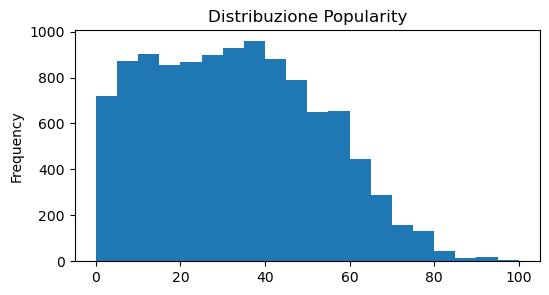

In [51]:
tracks["popularity"].plot(kind="hist", bins=20, figsize=(6,3), title="Distribuzione Popularity")

In [52]:
pop_outliers = tracks[(tracks["popularity"] < 0) | (tracks["popularity"] > 100)]
print("Errori popularity fuori range:", len(pop_outliers))
pop_outliers[["id","title","popularity"]].head()

Errori popularity fuori range: 0


,id,title,popularity


In [53]:
tracks["popularity_stream_ratio"] = tracks["streams@1month"] / (tracks["popularity"] + 1)

# tracce con streams alti ma popularity bassa
sus_low_pop = tracks[
    (tracks["popularity"] <= 5) &
    (tracks["streams@1month"] > tracks["streams@1month"].quantile(0.90))
]

print("Tracce con popularity bassa ma streams altissimi:", len(sus_low_pop))
sus_low_pop[["id","title","popularity","streams@1month"]].head()

Tracce con popularity bassa ma streams altissimi: 7


,id,title,popularity,streams@1month
3793,TR264558,Bandar-log,1,74733
4952,TR418597,Cracovia Pt. 2,1,198967
9007,TR348514,Principe Pyrex,5,43789
9322,TR142991,I LOVE IT,0,83444
9324,TR412568,30°C,4,50930


In [54]:
sus_zero_pop = tracks[
    (tracks["popularity"] == 0) &
    ((tracks["swear_it"] + tracks["swear_en"] > 10) |
     (tracks["streams@1month"] > 10000))
]

print("Popularity=0 ma brano attivo/ricco:", len(sus_zero_pop))
sus_zero_pop[["id","title","popularity","streams@1month"]].head()

Popularity=0 ma brano attivo/ricco: 22


,id,title,popularity,streams@1month
419,TR293124,N70,0,17817
452,TR348515,Maradona,0,4862
4981,TR345373,Buchi Al Petto,0,10562
6160,TR742710,Knockout,0,4321
6867,TR393635,Arte Freestyle,0,4368


In [56]:
# Statistiche di base (in ms e in secondi)
print("=== duration_ms: descrizione (ms) ===")
print(tracks["duration_ms"].describe())

print("\n=== duration (secondi) ===")
print((tracks["duration_ms"] / 1000).describe())

dur = tracks["duration_ms"]

# 1) Valori sicuramente non validi
duration_invalid = tracks[
    dur.notna() & (dur <= 0)
]
duration_missing = tracks[dur.isna()]

print("\nValori duration_ms invalidi (<=0):", len(duration_invalid))
print("Valori duration_ms mancanti (NaN):", len(duration_missing))

=== duration_ms: descrizione (ms) ===
count          11088.0
mean     203529.268849
std       88256.411071
min            11426.0
25%           170131.0
50%           196672.5
75%           227184.0
max          3753057.0
Name: duration_ms, dtype: Float64

=== duration (secondi) ===
count       11088.0
mean     203.529269
std       88.256411
min          11.426
25%         170.131
50%        196.6725
75%         227.184
max        3753.057
Name: duration_ms, dtype: Float64

Valori duration_ms invalidi (<=0): 0
Valori duration_ms mancanti (NaN): 78


In [57]:
print("\n\n=== bpm: descrizione ===")
print(tracks["bpm"].describe())

bpm = tracks["bpm"]

# 1) Valori sicuramente non validi
bpm_invalid = tracks[
    bpm.notna() & (bpm <= 0)
]
bpm_missing = tracks[bpm.isna()]

print("\nValori bpm invalidi (<=0):", len(bpm_invalid))
print("Valori bpm mancanti (NaN):", len(bpm_missing))



=== bpm: descrizione ===
count    11102.000000
mean       114.134841
std         26.827124
min         59.970000
25%         91.910000
50%        106.975000
75%        134.650000
max        738.270000
Name: bpm, dtype: float64

Valori bpm invalidi (<=0): 0
Valori bpm mancanti (NaN): 64


In [ ]:
# stocazzo